<h1><center>Integrantes</center></h1>
<ol>
<li><h4> Oscar Fabian Barrios -> 160002803</h4></li>
<li><h4> Maximiliano Cárdenas -> 160003105</h4></li>
</ol>

<p>Ud ha sido contratado para desarrollar un casino en línea. Entre los juegos del casino se necesita implementar un juego de mesa para el lanzamiento de dados el cual es necesario simular. Sin embargo, la novedad del juego en línea es que se lanzan 3 dados del estilo de World of Warcraft (WoW), es decir no necesariamente 3 dados convencionales de seis caras (d6) como en la mayoría de casinos. En este caso, Ud debe:</p>

<p>
    1) Implementar una función que simule el lanzamiento de 3 dados usando generadores congruenciales mixtos con semillas diferentes, el primer dado de ocho caras (d8), el segundo dado de doce caras (d12), y el tercero dado de veinte caras (d20).</p>
<p>
    2) Generar y mostrar los numeros de los tres dados para 1000 lanzamientos.
</p>
<p>
Si la la variable aleatoria es la suma de las caras de los tres dados, entonces:
</p>
<p>
    3) ¿Cuál es el valor teórico esperado?
</p>
<p>
    4) ¿Cuál es el promedio de los anteriores 1000 lanzamientos?
</p>
<p>
    5) ¿Cuál es la moda de los anteriores 1000 lanzamientos?</p>
 

In [1]:
sem = 2222
def congruencial_mixto(cantidad=10, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    numeros = []
    xo = sem
    a = a
    c = c
    m = m
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

In [2]:
def comparar_aleatorios(Xo, cantidad_a_generar=100):
    numeros = congruencial_mixto(cantidad=1000)
    probabilidad = {}
    x = list(Xo[0])
    for clave in x:
        probabilidad['{}'.format(clave)] = 0
    px = list(Xo[1])
    numeroResult = []
    for num in numeros:
        indice = 0
        while indice < len(px):
            if num <= px[indice]:
                probabilidad['{}'.format(x[indice])] = probabilidad['{}'.format(x[indice])] + 1
                numeroResult.append(indice + 1)
                break
            indice = indice + 1
    return numeroResult

In [3]:
def modaLista(lista):
    aux = 0
    cont = 0
    moda = -1
    lista.sort()
    for i in range(0,len(lista)-1):
        if (lista[i] == lista[i+1]):
            cont = cont + 1
            if cont >= aux:
                aux = cont
                moda = lista[i]
        else:
            cont=0
 
    return moda

In [16]:
def valor_teorico(valores):
    resultado = 0
    for i in valores:
        resultado = resultado + i
    return (resultado)

Valor teorico esperado 21.5
promedio lanzamientos 21.455
La moda es 25
moda con libreria scipy ModeResult(mode=array([25]), count=array([59]))


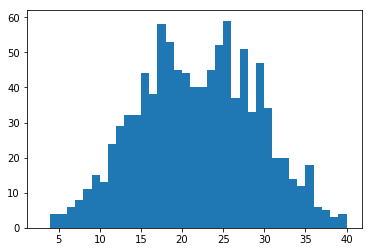

In [39]:
suma = 0
n1 = 8
n2 = 12
n3 = 20
d1 = []
D1 = []
d2 = []
D2 = []
d3 = []
D3 = []
d1.append(1)
D1.append(1/n1)
for i in range(1,n1):
    d1.append(i+1)
    D1.append(D1[i-1]+1/n1)
# print (d1)
d2.append(1)
D2.append(1/n2)
for i in range(1,n2):
    d2.append(i+1)
    D2.append(D2[i-1]+1/n2)
# print (d2)
d3.append(1)
D3.append(1/n3)
for i in range(1,n3):
    d3.append(i+1)
    D3.append(D3[i-1]+1/n3)
# print (d3)
numd1 = comparar_aleatorios([d1,D1])
numd2 = comparar_aleatorios([d2,D2])
numd3 = comparar_aleatorios([d3,D3])
'''
print ("valores dado 1", numd1)
print ("valores dado 2", numd2)
print ("valores dado 3", numd3)
'''
# suma
suma = []
#print (('{} \t {}\t {}'.format("dado1", "dado2", "dado3")))
for i in range (0, len(numd1)):
    #print (('{} \t {}\t {}'.format(numd1[i], numd2[i], numd3[i])))
    suma.append(numd1[i]+numd2[i]+numd3[i])

valor = valor_teorico(D1)
valor = valor + valor_teorico(D2)
valor = valor + valor_teorico(D3)
print ("Valor teorico esperado", valor)

from matplotlib.pyplot import hist, show
valores, suma1, otro = hist(suma, (n1+n2+n3-3), (3,n1+n2+n3))
promedio = 0
for contador in range(0, len(valores)):
    promedio = promedio + (valores[contador]/len(suma))*suma1[contador]

print ("promedio lanzamientos", promedio)
print ("La moda es", modaLista(suma))
from scipy import stats
print ("moda con libreria scipy",stats.mode(suma))



show()
